In [1]:
# long hair detection model
print("hii")

hii


In [4]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adamax,Adadelta,Adagrad,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
folder='./UTKFace'

In [4]:
folder


'./UTKFace'

In [5]:
fil=os.listdir(folder)

In [6]:
ages=[]
hairs=[]
images=[]
for file in fil:
    age=int(file.split('_')[0])
    hair=int(file.split('_')[1])
    ages.append(age)
    hairs.append(hair)
    total=folder+'/'+file
    #print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)




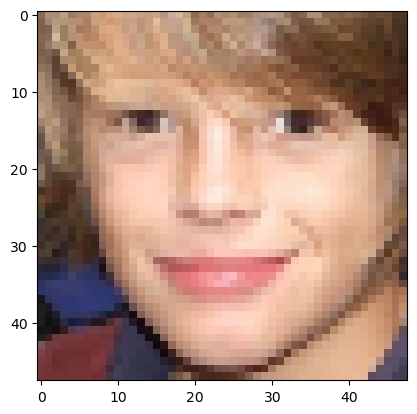

In [7]:
plt.imshow(images[78])

In [8]:
print(hairs[78])

0


In [9]:
## convert into array /store into array

hairs_f=np.array(hairs)
ages_f=np.array(ages)
images_f=np.array(images)

In [10]:

np.save(folder+'hairs.npy',hairs_f)
np.save(folder+'ages.npy',ages_f)
np.save(folder+'images.npy',images_f)

In [11]:
## plotting sample


In [12]:
values,counts=np.unique(hairs_f,return_counts=True)
print(counts)

[12391 11317]


In [13]:
print(len(hairs))

23708


In [14]:
##splitting dataset
labels=[]
i=0
while i<len(hairs):
    label=[]
    label.append(ages[i])
    label.append(hairs[i])
    labels.append(label)
    i=i+1

In [15]:
labels_f=np.array(labels)

In [16]:
labels_f.shape

(23708, 2)

In [17]:
images_f_2=images_f/255
images_f_2.shape

(23708, 48, 48, 3)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [20]:
y_train[0:5]

array([[63,  0],
       [59,  0],
       [47,  0],
       [26,  1],
       [46,  0]])

In [21]:
y_test[0:5]

array([[23,  1],
       [ 3,  0],
       [56,  0],
       [26,  1],
       [23,  0]])

In [22]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [23]:
y_train_2[0][0:5]



array([0, 0, 0, 1, 0])

In [24]:
y_test_2[0][0:5]

array([1, 0, 0, 1, 0])

In [25]:
#building model
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding='same',strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x




In [26]:
def model(input_shape):
    inputs=Input((input_shape))
    conv1=Convolution(inputs,32)
    max1=MaxPool2D(pool_size=(2,2))(conv1)
    conv2=Convolution(max1,64)
    max2=MaxPool2D(pool_size=(2,2))(conv2)
    conv3=Convolution(max2,128)
    max3=MaxPool2D(pool_size=(2,2))(conv3)
    conv4=Convolution(max3,256)
    max4=MaxPool2D(pool_size=(2,2))(conv4)
    flatten=Flatten()(max4)

    Dense1=Dense(64,activation='relu')(flatten)
    Dense2=Dense(64,activation='relu')(flatten)
    
    Drop1=Dropout(0.01)(Dense1)
    Drop2=Dropout(0.01)(Dense2)
    
    output_1=Dense(1,activation='relu',name='age_res')(Drop1)
    output_2=Dense(1,activation='relu',name='hair_length')(Drop2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','mse'],optimizer='Adam',metrics=['accuracy','accuracy'])
    return model

    
    

In [27]:
model=model((48,48,3))

In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 48, 48,    │          0 │ dropout[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │          0 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 24, 24,    │          0 │ dropout_1[0][0]   │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │          0 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 12, 12,    │          0 │ dropout_2[0][0]   │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │    295,168 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │          0 │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 6, 6, 256) │          0 │ dropout_3[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [30]:
fls='hairs_model.keras'
checkpoint=ModelCheckpoint(fls,verbose=1,monitor='val_loss',mode='auto',
                           save_best_only=True,save_weights_only=False,save_freq='epoch')
earlystop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,earlystop]

In [31]:
History=model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=3)


Epoch 1/3


c:\Users\tusha\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 48, 48, 3))
  warnings.warn(msg)


278/278 ━━━━━━━━━━━━━━━━━━━━ 64s 208ms/step - age_res_accuracy: 0.5297 - age_res_loss: 7.5810 - hair_length_accuracy: 0.0460 - hair_length_loss: 569.2780 - loss: 577.1428 - val_age_res_accuracy: 0.5203 - val_age_res_loss: 7.7284 - val_hair_length_accuracy: 0.0489 - val_hair_length_loss: 499.0375 - val_loss: 507.5156
Epoch 2/3
278/278 ━━━━━━━━━━━━━━━━━━━━ 53s 192ms/step - age_res_accuracy: 0.5243 - age_res_loss: 7.6680 - hair_length_accuracy: 0.0477 - hair_length_loss: 300.7950 - loss: 308.7594 - val_age_res_accuracy: 0.5203 - val_age_res_loss: 7.7284 - val_hair_length_accuracy: 0.0467 - val_hair_length_loss: 215.9851 - val_loss: 224.1823
Epoch 3/3
278/278 ━━━━━━━━━━━━━━━━━━━━ 52s 188ms/step - age_res_accuracy: 0.5231 - age_res_loss: 7.6875 - hair_length_accuracy: 0.0433 - hair_length_loss: 202.9503 - loss: 210.9966 - val_age_res_accuracy: 0.5203 - val_age_res_loss: 7.7284 - val_hair_length_accuracy: 0.0450 - val_hair_length_loss: 188.6360 - val_loss: 196.8010


In [32]:
model.evaluate(x_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - age_res_accuracy: 0.5224 - age_res_loss: 7.6979 - hair_length_accuracy: 0.0439 - hair_length_loss: 195.8323 - loss: 203.9268


[196.80104064941406,
 7.73756742477417,
 188.31240844726562,
 0.5203306674957275,
 0.04504808411002159]

In [33]:
pred=model.predict(x_test)
pred[0:5]

  4/186 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step  

c:\Users\tusha\anaconda3\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 48, 48, 3))
  warnings.warn(msg)


186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


[array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[20.99248 ],
        [19.41567 ],
        [43.032753],
        ...,
        [23.30613 ],
        [18.76662 ],
        [13.925403]], dtype=float32)]

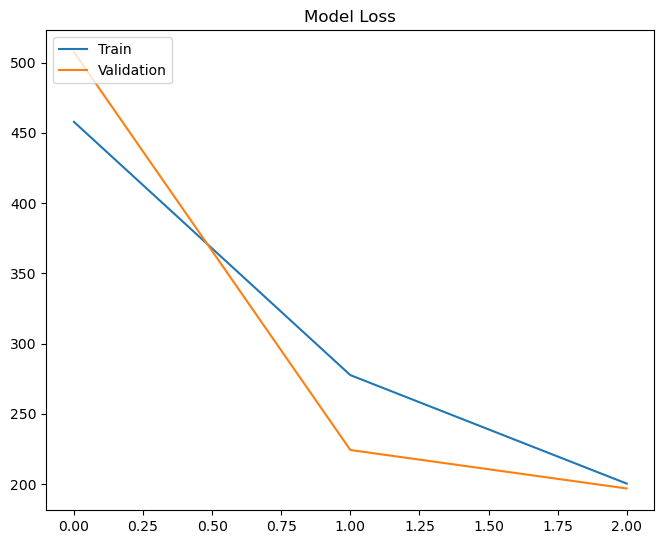

In [34]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

In [35]:
i=0
pred_l=[]
while(i<len(pred[0])):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\tusha\AppData\Local\Temp\ipykernel_12008\3890174900.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_l.append(int(np.round(pred[0][i])))


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [37]:
model.save('hairs_model.keras')

In [1]:
from tensorflow.keras.models import load_model
age_model=load_model('Age_Sex_Detection.keras')
hair_model=load_model('C:/Users/tusha/anaconda/INTERNSHIP/2_intern_task/hairs_model.keras')
gender_model=load_model('gender_model.keras')

In [39]:
#age_model.summary()

In [8]:

def predict_age_hair_gender(image):
    # Preprocess the image (resize and normalize)
    img_resized = cv2.resize(image, (48,48))
    img_normalized = img_resized / 255.0
    img_normalized = np.expand_dims(img_normalized, axis=0)  # Add batch dimension

    # Step 1: Predict the age
    predicted_age = age_model.predict(img_normalized)[0][0]

    # Step 2: Conditional classification based on age
    if 20 <= predicted_age <= 30:   #if age<30 and age>20:
        # If age is between 20 and 30, use the hair length model to infer gender
        predicted_hair_label = hair_model.predict(img_normalized)[0][0]
        #gender = 'Male' if predicted_hair_label == 0 else 'Female'
        hair_length ='Short' if predicted_hair_label == 0 else 'Long'
        
    else:
        # If age is outside this range, use the general gender classification model
        predicted_gender_label = gender_model.predict(img_normalized)[0][0]
        gender = 'Male' if predicted_gender_label == 0 else 'Female'
        hair_length = 'not define'
        

    return {
        'Predicted Age': predicted_age,
        'Gender': gender,
        'Hair Length': hair_length
    }


In [9]:
# Load an image
#image_path = r"UTKFace/20_1_2_20170104015722028.jpg.chip.jpg"
#image_path=r"UTKFace/26_0_1_20170116181040400.jpg.chip.jpg"
#image_path=r"UTKFace/42_1_1_20170113001552715.jpg.chip.jpg"
image_path="UTKFace/25_1_3_20170104222454999.jpg.chip.jpg"
image = cv2.imread(image_path)

# Get predictions
predictions = predict_age_hair_gender(image)

# Print the results
print(f"Predicted Age: {predictions['Predicted Age']:.2f} years")
print(f"Gender: {predictions['Gender']}")
print(f"Hair Length: {predictions['Hair Length']}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


TypeError: unsupported format string passed to numpy.ndarray.__format__